In [86]:
import csv
import re
import glob
import datetime
from pathlib import Path
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy
print(matplotlib.matplotlib_fname())
matplotlib.font_manager._rebuild()

C:\Users\andre\.matplotlib\matplotlibrc


In [87]:
# import matplotlib.font_manager
# flist = matplotlib.font_manager.get_fontconfig_fonts()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# print(names)

In [88]:
SAVE_FIG = False
# "OneJump" , "StutterJump" , "TimeJump"
JUMP_TYPE = "OneJump"

In [89]:
save_path = Path.cwd()
print(save_path)
figures_data_path = save_path / 'figures_data'
print(figures_data_path)
figures_path = save_path / 'figures'
print(figures_path)
if not os.path.exists(figures_data_path):
    os.makedirs(figures_data_path)
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

c:\Users\andre\Documents\Education\Graduate School_ULL\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\pogo_stick\LearnJumpHeight
c:\Users\andre\Documents\Education\Graduate School_ULL\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\pogo_stick\LearnJumpHeight\figures_data
c:\Users\andre\Documents\Education\Graduate School_ULL\GitHub\CRAWLAB-Student-Code---2020\Andrew Albright\Code\pogo_stick\LearnJumpHeight\figures


In [90]:
# sort the files read in
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

files = sorted(glob.glob(str(figures_data_path / '*.csv')), key=numericalSort)

print(f'Number of Agents found: {len(files)}\n')

# organize the data into dictionaries
data = {}                                                                                   # dict to store agent data
file_names = []                                                                             # list to store file names for naming agents in dict
for f in files:
    file_name = os.path.basename(f)                                                         # get file name and split it up by
    file_name = re.split('[_ .]', file_name)
    # uncomment print statment to determine what numbers are needed in file_name
    print(file_name)
    file_name = file_name[1] + file_name[2]                                                 # choose the parts of file name you want to keep using the previous print statment
    file_names.append(file_name)                                                            # add the agents name to the list of file names
    df = pandas.read_csv(f)                                                                 # read in the first .csv file
    df_columns = list(df)                                                                   # get the list of data column names
    for column in df_columns:                                                               
        df_columns[df_columns.index(column)] = column.replace(' ', '').replace('#', '')     # get rid of spaces and #'s in the column names
    df.columns = df_columns                                                                 # set the .csv file column names to the cleaned up names
    data[file_name] = df.to_dict('series')                                                  # turn the .csv into a dict and place it in the data dict

    for column in data[file_name]:
            data[file_name][column] = data[file_name][column].to_numpy()                    # convert the columns in the agent dict in the data dict to numpy arrays
print(f'\nAgent Key Names: {list(data)}\n')                                                    # print out the agents names for using later in plotting
print(f"""\nAgent's Data Key Names: {list(data[next(iter(data))])}\n""")                       # print out the data column names for using later in plotting

deleted = 0
for agent in list(data):
    if np.max(data[agent]['RodPos']) <= 0.05:
        del data[agent]
        print(f'{agent} never gets off the ground, deleting it.')
        deleted = deleted + 1
print(f'\nNumber of agents deleted: {deleted}. Number of agents remaining: {len(list(data))}')
print(f'\nAgent Key Names: {list(data)}\n')                                                    # print out the agents names for using later in plotting

Number of Agents found: 10

['EpisodeData', 'HeiOneJump', '16', 'csv']
['EpisodeData', 'HeiOneJump', '104', 'csv']
['EpisodeData', 'HeiOneJump', '107', 'csv']
['EpisodeData', 'HeiOneJump', '250', 'csv']
['EpisodeData', 'HeiOneJump', '676', 'csv']
['EpisodeData', 'HeiOneJump', '767', 'csv']
['EpisodeData', 'HeiOneJump', '868', 'csv']
['EpisodeData', 'HeiOneJump', '878', 'csv']
['EpisodeData', 'HeiOneJump', '918', 'csv']
['EpisodeData', 'HeiOneJump', '947', 'csv']

Agent Key Names: ['HeiOneJump16', 'HeiOneJump104', 'HeiOneJump107', 'HeiOneJump250', 'HeiOneJump676', 'HeiOneJump767', 'HeiOneJump868', 'HeiOneJump878', 'HeiOneJump918', 'HeiOneJump947']


Agent's Data Key Names: ['Time', 'RodPos', 'RodVel', 'ActuatorPos', 'ActuatorVel', 'ActuatorAccel', 'Power', 'OmegaX', 'OmegaP', 'Reward']

HeiOneJump16 never gets off the ground, deleting it.
HeiOneJump104 never gets off the ground, deleting it.
HeiOneJump107 never gets off the ground, deleting it.
HeiOneJump767 never gets off the ground, d

## Position vs Time

Heights Reached During Data 0: 0.16211628092839758, -0.05516144071675912
Heights Reached During Data 1: 0.20667864952187398, -0.06203431721019265
Heights Reached During Data 2: 0.1644827910870747, -0.05516144071675912
Heights Reached During Data 3: 0.16268371114538974, -0.05516144071675912


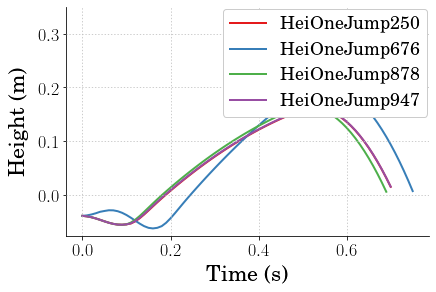

In [91]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

linestyle = ['-', '--', '-.', ':', ':']
for agent in data:
    plt.plot(data[agent]["Time"], data[agent]["RodPos"], linewidth=2, linestyle='-', label=agent)
    max_height_reached = np.max(data[agent]["RodPos"])
    min_height_reached = np.min(data[agent]["RodPos"])
    print(f"Heights Reached During Data {list(data.keys()).index(agent)}: {max_height_reached}, {min_height_reached}")


# uncomment below and set limits if needed
# plt.xlim(0,4)
plt.ylim(bottom=None, top=.35)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'PositionVsTime_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Actuator Postion vs Time

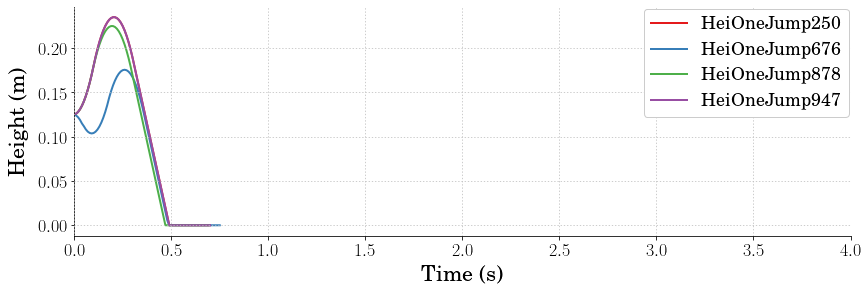

In [92]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(12,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

linestyle = ['-', '--', '-.', ':']
for agent in data:
    plt.plot(data[agent]["Time"], data[agent]["ActuatorPos"], linewidth=2, linestyle='-', label=agent)


# uncomment below and set limits if needed
plt.xlim(0,4)
# plt.ylim(bottom=None, top=.55)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'ActuatorPositionVsTime_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Height vs Agent

[]
HeiOneJump250 height reached is: 0.16211628092839758
HeiOneJump676 height reached is: 0.20667864952187398
HeiOneJump878 height reached is: 0.1644827910870747
HeiOneJump947 height reached is: 0.16268371114538974


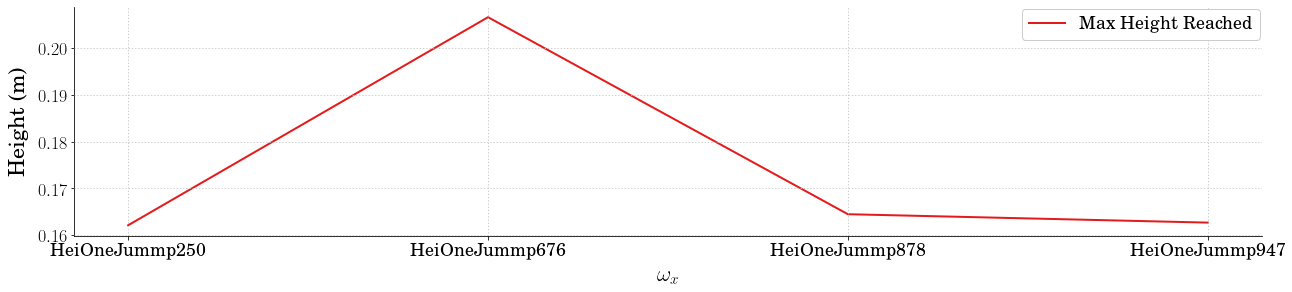

In [93]:
heights = []
agents = []
print(agents)
for agent in data:
    # min for spring compression, max for jump height
    height = np.max(data[agent]["RodPos"])
    heights.append(height) 
    print(f'{agent} height reached is: {height}')

    agents.append(f'{agent[0:9]}{agent[-5:]}')
    
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(18,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)
 
plt.plot(agents, heights, linewidth=2, linestyle='-', label='Max Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
# plt.ylim(bottom=None, top=.00225)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MaxPositionVsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Power vs Time

Power Used during data 0: 356.0646479949951
Power Used during data 1: 271.5353491243488
Power Used during data 2: 336.005
Power Used during data 3: 352.2305072634921


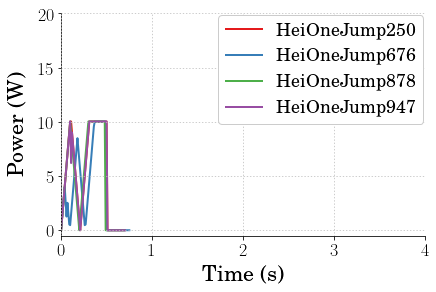

In [94]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (W)', fontsize=22, weight='bold', labelpad=10)
 
linestyle = ['-', '--', '-.', ':']
for agent in data:
    plt.plot(data[agent]["Time"], data[agent]["Power"], linewidth=2, linestyle='-', label=agent)
    power_used = np.sum(data[agent]["Power"])
    print(f"Power Used during data {list(data.keys()).index(agent)}: {power_used}")

# uncomment below and set limits if needed
plt.xlim(0,4)
plt.ylim(bottom=None, top=20)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'PowerVsTime_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Power vs Agent

[]


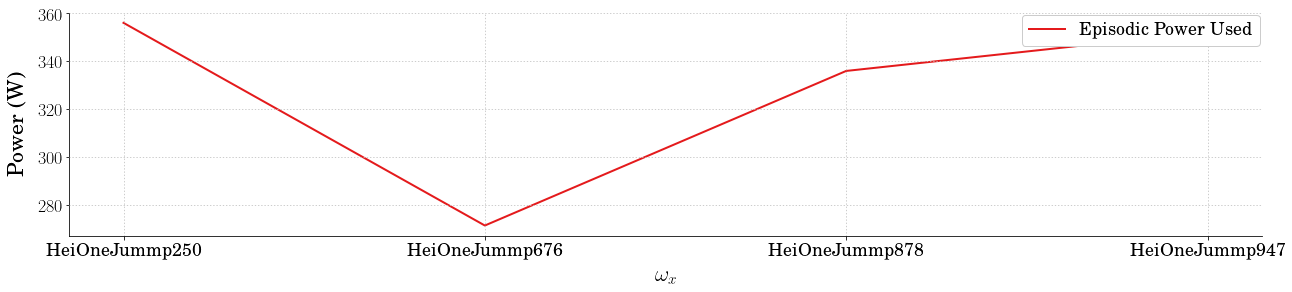

In [95]:
powers = []
agents = []
print(agents)
for agent in data:
    power = np.sum(data[agent]["Power"])
    powers.append(power) 
    # print(f'{agent} power used is: {power}')

    agents.append(f'{agent[0:9]}{agent[-5:]}')
    
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(18,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (W)', fontsize=22, weight='bold', labelpad=10)
 
plt.plot(agents, powers, linewidth=2, linestyle='-', label='Episodic Power Used')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
# plt.ylim(bottom=None, top=.00225)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'PowervsAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Reward Vs Time

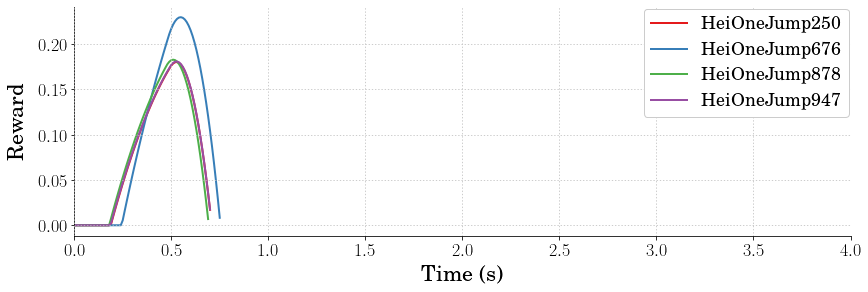

In [96]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(12,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Reward', fontsize=22, weight='bold', labelpad=10)
 
linestyle = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
for agent in data:
    plt.plot(data[agent]["Time"], data[agent]["Reward"], linewidth=2, linestyle='-', label=agent)

# uncomment below and set limits if needed
plt.xlim(0,4)
# plt.ylim(bottom=None, top=20)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'RewardVsTime_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Reward vs Agent

[]
HeiOneJump250 Reward: 5.77325328279902
HeiOneJump676 Reward: 7.214022571606198
HeiOneJump878 Reward: 5.7643194423940285
HeiOneJump947 Reward: 5.8119353238530405


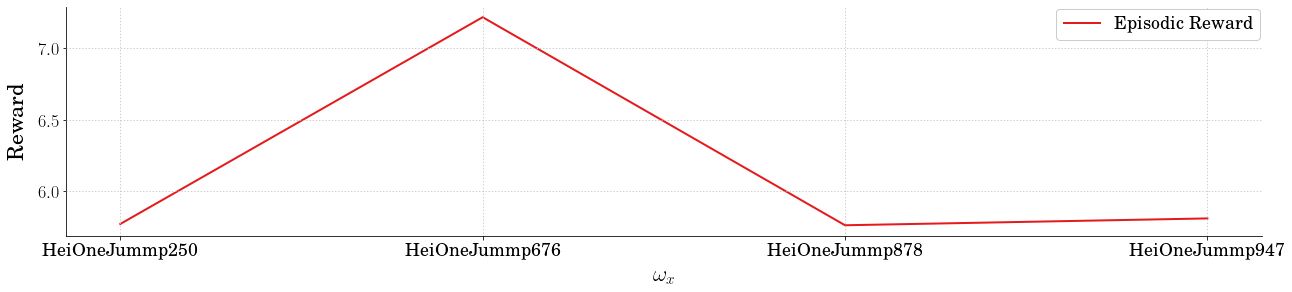

In [97]:
rewards = []
agents = []
print(agents)
for agent in data:
    power = np.sum(data[agent]["Reward"])
    rewards.append(power) 
    print(f'{agent} Reward: {power}')
    agents.append(f'{agent[0:9]}{agent[-5:]}')
    
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(18,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Reward', fontsize=22, weight='bold', labelpad=10)
 
plt.plot(agents, rewards, linewidth=2, linestyle='-', label='Episodic Reward')

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
# plt.ylim(bottom=None, top=.00225)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'RewardvsAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Efficiency vs Agent

[]
HeiOneJump250 efficiency is: 0.00045530013114550007
HeiOneJump676 efficiency is: 0.0007611482268823354
HeiOneJump878 efficiency is: 0.0004895248317348691
HeiOneJump947 efficiency is: 0.00046186718012954905


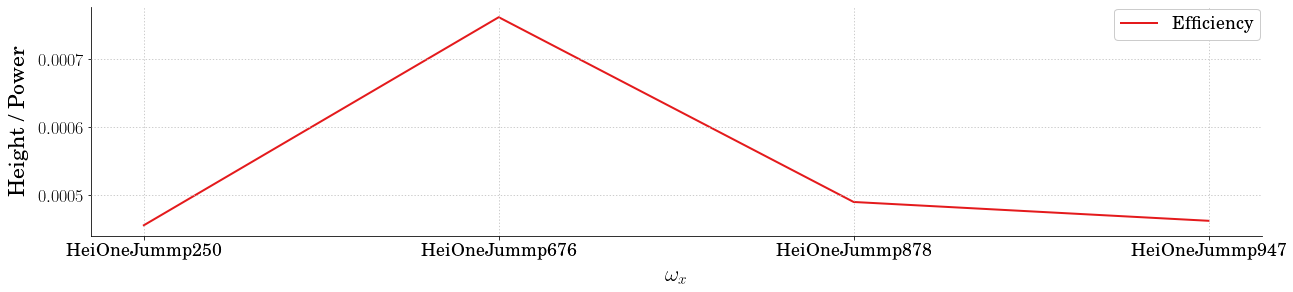

In [98]:
efficiencies = []
agents = []
print(agents)
for agent in data:
    efficiency = np.max(data[agent]["RodPos"]) / np.sum(data[agent]["Power"])
    efficiencies.append(efficiency) 
    print(f'{agent} efficiency is: {efficiency}')

    agents.append(f'{agent[0:9]}{agent[-5:]}')
    
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(18,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height / Power', fontsize=22, weight='bold', labelpad=10)
 
plt.plot(agents, efficiencies, linewidth=2, linestyle='-', label='Efficiency')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
# plt.ylim(bottom=None, top=.00225)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'EfficiencyVsAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Best Agent

HeiOneJump676 is the best Agent
HeiOneJump676 jumps 0.21m using 271.54W


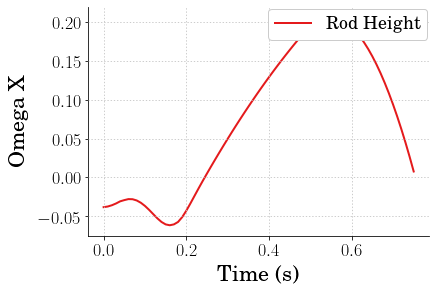

In [99]:
best_ratio = 0.0
for agent in data:
    if np.max(data[agent]["RodPos"]) / np.sum(data[agent]["Power"]) > best_ratio:
        best_ratio = np.max(data[agent]["RodPos"]) / np.sum(data[agent]["Power"])
        best_agent = agent
print(f'{best_agent} is the best Agent')
print(f'{best_agent} jumps {np.max(data[best_agent]["RodPos"]):.2f}m using {np.sum(data[best_agent]["Power"]):.2f}W')

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Omega X', fontsize=22, weight='bold', labelpad=10)

plt.plot(data[best_agent]["Time"], data[best_agent]["RodPos"], linewidth=2, linestyle='-', label='Rod Height')

# uncomment below and set limits if needed
# plt.xlim(0,1.25)
# plt.ylim(bottom=None, top=1.75)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MostEfficientAgent_{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Averaging Jump Height

In [100]:
average_heights = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    average_height = []
    for agent in data:
        if name in agent:
            average_height.append(max(data[agent]["RodPos"]))
    average_heights[rewards.index(ii)] = sum(average_height) / len(average_height)
print(average_heights)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, average_heights, label='Average Heights Reached')
# plt.plot(rewards, average_heights, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=1)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AverageHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

ZeroDivisionError: division by zero

## Max Height vs Agent

[0.20509388 0.20667865]


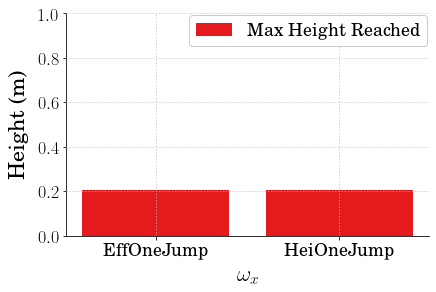

In [31]:
max_heights = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    max_height = []
    for agent in data:
        if name in agent:
            max_height.append(max(data[agent]["RodPos"]))
    max_heights[rewards.index(ii)] = max(max_height)
print(max_heights)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, max_heights, label='Max Height Reached')
# plt.plot(rewards, max_heights, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=1)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MaxHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Average Power vs Agent

[280.92800021 328.9588761 ]


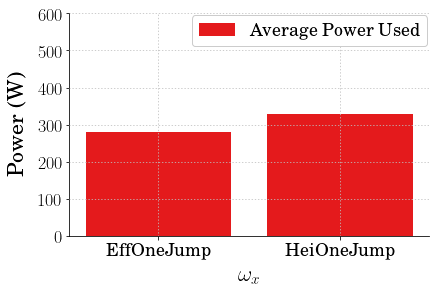

In [32]:
average_powers = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    powers = []
    for agent in data:
        if name in agent:
            powers.append(sum(data[agent]["Power"]))
    average_powers[rewards.index(ii)] = sum(powers) / len(powers)
print(average_powers)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (W)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, average_powers, label='Average Power Used')
# plt.plot(rewards, average_powers, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=600)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AveragePowervsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Max Power Used vs Agent

[313.93899866 356.06464799]


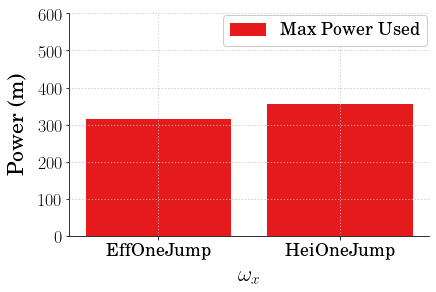

In [33]:
max_powers = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    power = []
    for agent in data:
        if name in agent:
            power.append(sum(data[agent]["Power"]))
    max_powers[rewards.index(ii)] = max(power)
print(max_powers)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, max_powers, label='Max Power Used')
# plt.plot(rewards, max_powers, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=600)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'MaxHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Average Efficiency vs Agent

[0.00063901 0.00054196]


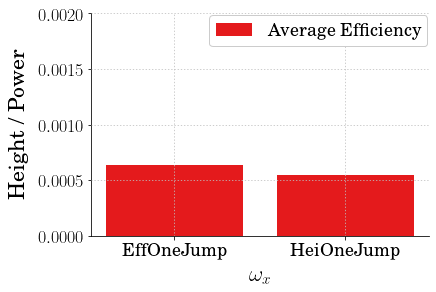

In [34]:
average_efficiencies = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    average_efficiency = []
    for agent in data:
        if name in agent:
            average_efficiency.append(max(data[agent]["RodPos"]) / sum(data[agent]["Power"]))
    average_efficiencies[rewards.index(ii)] = sum(average_efficiency) / len(average_efficiency)
print(average_efficiencies)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height / Power', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, average_efficiencies, label='Average Efficiency')
# plt.plot(rewards, average_efficiencies, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=0.002)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AverageHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Max Efficiencies vs Agent

[0.00089307 0.00076115]


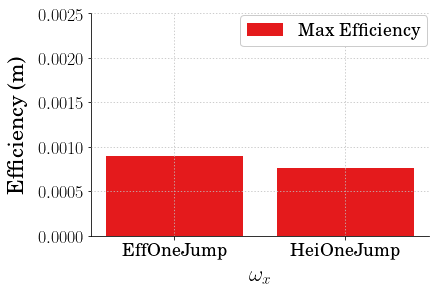

In [35]:
max_efficiencies = np.zeros(2)
rewards = [f'Eff{JUMP_TYPE}', f'Hei{JUMP_TYPE}']
for ii in rewards:
    name = ii
    efficiency = []
    for agent in data:
        if name in agent:
            efficiency.append(max(data[agent]["RodPos"]) / sum(data[agent]["Power"]))
    max_efficiencies[rewards.index(ii)] = max(efficiency)
print(max_efficiencies)

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()

# Define the X and Y axis labels
plt.xlabel(r'\mbox{$\omega_x$}', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Efficiency (m)', fontsize=22, weight='bold', labelpad=10)

plt.bar(rewards, max_efficiencies, label='Max Efficiency')
# plt.plot(rewards, max_efficiencies, linewidth=2, linestyle='-', label='Average Height Reached')
# plt.plot(agents, efficiencies(agents), "r--")

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=0.0025)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
filename = 'AverageHeightvsAgent{}.png'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S'))
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()

## Compare Heights

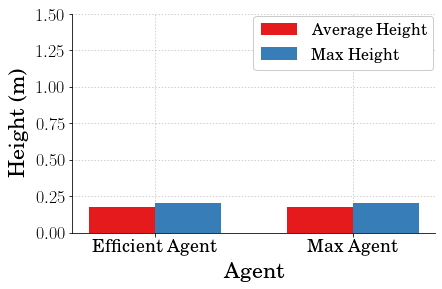

Average Percent Difference: -0.6103270386379488
 Max Percent Difference: -0.7667791417263765


In [36]:
# Plot the data
# Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.12,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Agent', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Height (m)', family='serif', fontsize=22, weight='bold', labelpad=8)

plt.bar([1, 1.75], average_heights, width=0.25, align='center', label="Average Height")
plt.bar([1.25, 2], max_heights, width=0.25, align='center', label="Max Height")

plt.xticks([1.125, 1.875], ['Efficient Agent', 'Max Agent'])

# Uncomment below to rotate the labels to be vertical, if needed
# plt.setp(ax.get_xmajorticklabels(), rotation=90)

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=1.5)

# Uncomment below to add a legend if necessary
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
filename = f'CompareHeight_{JUMP_TYPE}.png'
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()


# show the figure
plt.show()

average_percent = (average_heights[0] - average_heights[1]) / average_heights[1] * 100
max_percent = (max_heights[0] - max_heights[1]) / max_heights[1] * 100
print(f'Average Percent Difference: {average_percent}\n Max Percent Difference: {max_percent}')

## Compare Power Used

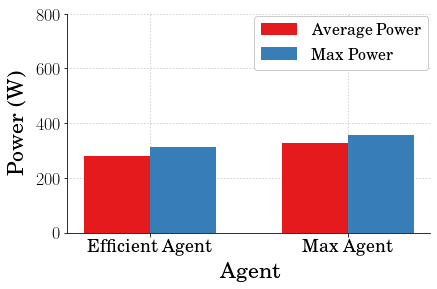

Average Percent Difference: -14.60087548336008
 Max Percent Difference: -11.830899127828244


In [37]:
# Plot the data
# Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.12,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Agent', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Power (W)', family='serif', fontsize=22, weight='bold', labelpad=8)

plt.bar([1, 1.75], average_powers, width=0.25, align='center', label="Average Power")
plt.bar([1.25, 2], max_powers, width=0.25, align='center', label="Max Power")

plt.xticks([1.125, 1.875], ['Efficient Agent', 'Max Agent'])

# Uncomment below to rotate the labels to be vertical, if needed
# plt.setp(ax.get_xmajorticklabels(), rotation=90)

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=800)

# Uncomment below to add a legend if necessary
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
filename = f'ComparePower_{JUMP_TYPE}.png'
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()


# show the figure
plt.show()

average_percent = (average_powers[0] - average_powers[1]) / average_powers[1] * 100
max_percent = (max_powers[0] - max_powers[1]) / max_powers[1] * 100
print(f'Average Percent Difference: {average_percent}\n Max Percent Difference: {max_percent}')

## Compare Efficiency

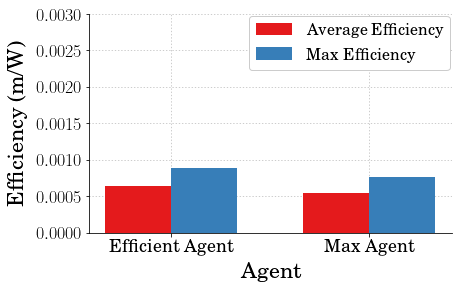

Average Percent Difference: 17.906343764757963
 Max Percent Difference: 17.331348932510217


In [38]:
# Plot the data
# Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.2,left=0.12,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel(r'Agent', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel(r'Efficiency (m/W)', family='serif', fontsize=22, weight='bold', labelpad=8)

plt.bar([1, 1.75], average_efficiencies, width=0.25, align='center', label="Average Efficiency")
plt.bar([1.25, 2], max_efficiencies, width=0.25, align='center', label="Max Efficiency")

plt.xticks([1.125, 1.875], ['Efficient Agent', 'Max Agent'])

# Uncomment below to rotate the labels to be vertical, if needed
# plt.setp(ax.get_xmajorticklabels(), rotation=90)

# uncomment below and set limits if needed
# plt.xlim(left=None, right=2)
plt.ylim(bottom=None, top=0.003)

# Uncomment below to add a legend if necessary
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='serif',fontsize=16)

# save the figure as a high-res pdf in the current folder
filename = f'CompareEfficiency_{JUMP_TYPE}.png'
path = figures_path / filename
if SAVE_FIG is True:
    plt.savefig(path)
plt.show()


# show the figure
plt.show()

average_percent = (average_efficiencies[0] - average_efficiencies[1]) / average_efficiencies[1] * 100
max_percent = (max_efficiencies[0] - max_efficiencies[1]) / max_efficiencies[1] * 100
print(f'Average Percent Difference: {average_percent}\n Max Percent Difference: {max_percent}')